In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats

In [2]:
df_orig = pd.read_csv('./evaluations.csv')

In [3]:
df_filtered = df_orig[(np.abs(stats.zscore(df_orig)) < 3).all(axis=1)]

In [4]:
len(df_orig), len(df_filtered), df_filtered.columns

(53204219,
 51159330,
 Index(['step', 'region_size', 'historic_nodes', 'predictive_nodes',
        'update_time'],
       dtype='object'))

In [5]:
df_update_time = df_filtered[['step', 'region_size', 'update_time']]

In [6]:
data = df_update_time.groupby(['step', 'region_size'],  as_index=False).mean()

In [7]:
data

,step,region_size,update_time
0,1,25,33.507844
1,1,50,34.268604
2,1,75,35.971846
3,1,100,38.641146
4,2,25,48.596266
5,2,50,50.756620
6,2,75,53.295968
7,2,100,57.196333
8,3,25,79.842975
9,3,50,82.728577


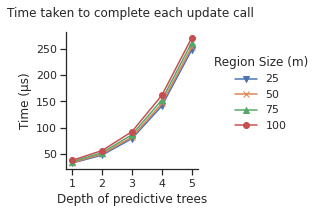

In [8]:
data['spec'] = 0
sns.set(style="ticks")
g = sns.FacetGrid(data, 
                  hue='region_size', col='spec',
                  hue_kws=dict(marker=["v", "x", "^", "o"]))
g = (g.map(
    plt.plot, 
    'step', 
    'update_time').add_legend(bbox_to_anchor=(0.75, 0.8), loc='upper left')
    ).set_titles('')#"Accuracy rates for present\n location predictions", y=1.1)
g.set(ylim=(None, None))
g.set(xticks=range(1,6))
g._legend.set_title('Region Size (m)')
g.set(xlabel='Depth of predictive trees', ylabel='Time (μs)')
g.fig.suptitle('Time taken to complete each update call', fontsize=12,)
g.savefig('./times.svg', format='svg')


<AxesSubplot:xlabel='step', ylabel='update_time'>

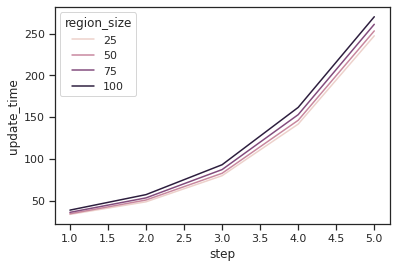

In [9]:
sns.lineplot(x='step', y='update_time', hue='region_size', 
             data=data)